# Handling the Time: 

The following exemples are using <font style="font-weight:bold">Obspy</font> package.

If you don't have it installed please see [how to install Obspy](https://github.com/obspy/obspy/wiki/Installation-via-Anaconda)

## Introduction to UTCDateTime

In [1]:
from obspy import UTCDateTime

In [2]:
# mostly time strings defined by ISO standard
print(UTCDateTime("2011-03-11T05:46:23.2"))
# non-UTC timezone input
print(UTCDateTime("2011-03-11T14:46:23.2+09:00")) 

print(UTCDateTime(2011, 3, 11, 5, 46, 23, 2))
# using timestamp
print(UTCDateTime(1299822383.2))
# current time
print(UTCDateTime()) 

2011-03-11T05:46:23.200000Z
2011-03-11T05:46:23.200000Z
2011-03-11T05:46:23.000002Z
2011-03-11T05:46:23.200000Z
2019-03-15T13:47:53.516607Z


## Attributes of UTCDateTime

In [3]:
time = UTCDateTime()

print("Year = {}, Julday = {}, Timestamp = {}, Weekday = {}".
      format(time.year, time.julday, time.timestamp, time.weekday))

Year = 2019, Julday = 74, Timestamp = 1552657673.5250657, Weekday = 4


## Adding an Hour in UTCDateTime

In [4]:
time = UTCDateTime()
print("Now = ", time)
time_later = time + 3600
print("An hour later = ", time_later)
print("Time diference = ", time_later - time)

Now =  2019-03-15T13:47:53.532846Z
An hour later =  2019-03-15T14:47:53.532846Z
Time diference =  3600.0


## Reading seismic data

In [5]:
from obspy import read as obs_read

st = obs_read('http://examples.obspy.org/RJOB_061005_072159.ehz.new')
print(st)

1 Trace(s) in Stream:
.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples


In [6]:
print("st size = ", len(st))
tr = st[0]  # assign first and only trace to new variable

st size =  1


In [7]:
# get file status.
print(tr.stats)

         network: 
         station: RJOB
        location: 
         channel: Z
       starttime: 2005-10-06T07:21:59.850000Z
         endtime: 2005-10-06T07:24:59.845000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 36000
           calib: 0.0949
         _format: GSE2
            gse2: AttribDict({'auxid': 'RJOB', 'datatype': 'CM6', 'calper': 1.0, 'instype': '', 'hang': -1.0, 'vang': -1.0, 'lat': -999.0, 'lon': -999.0, 'coordsys': '', 'elev': -0.999, 'edepth': -0.999})


## Accessing data

In [8]:
tr.data

array([-38,  12,  -4, ..., -14,  -3,  -9], dtype=int32)

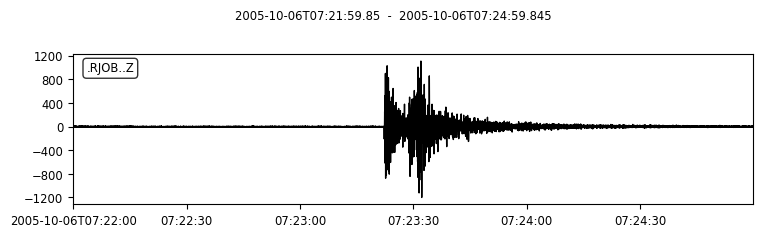

In [9]:
# make jupyter display plot, choose notebook or inline.
# %matplotlib notebook
%matplotlib inline 

preview_plot = st.plot()

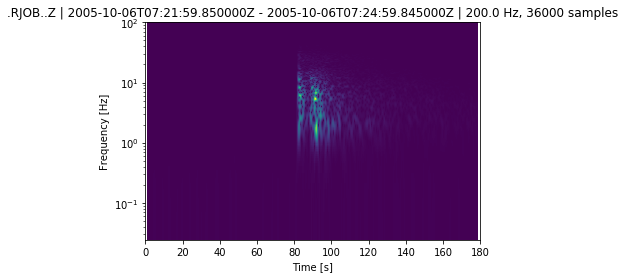

In [10]:
spectrogram_plot = st.spectrogram(log=True)

## Write back data

In [11]:
st.write('out.mseed', format='MSEED')

In [12]:
%ls out.mseed

out.mseed
